# Day 1 - Exercise

1. Query all sessions of ***rat*** with ***axona*** recording
2. Query all recordings ingested from the directory at ***valentno/Data/RatLauren/20171123/1***
3. Every unit has a unit type, ***ClusterType*** - for animal named "24321", for each cluster type, list all the units of that type
4. For animal named "24321", pick one session, fetch the x, y position of the tracked rigid body of that animal. Bonus: plot it
5. For the same animal/session in (4), from each probe, identify the unit with highest spike count
6. For those 2 units from (5), fetch the spike times, x, and y positions associated with each spike
7. Select any ***neurologger*** recording, fetch the LFP at each tetrode

In [1]:
import datajoint as dj
dj.config['display.limit'] = 10
dj.config['database.host'] = 'datajoint.it.ntnu.no'
dj.conn()

Please enter DataJoint username: thinh
Please enter DataJoint password: ········
Connecting thinh@datajoint.it.ntnu.no:3306


DataJoint connection (connected) thinh@datajoint.it.ntnu.no:3306

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
animal = dj.create_virtual_module('animal', 'prod_mlims_data')
reference = dj.create_virtual_module('reference', 'group_shared_reference')
acquisition = dj.create_virtual_module('acquisition', 'group_shared_acquisition')
tracking = dj.create_virtual_module('tracking', 'group_shared_tracking')
behavior = dj.create_virtual_module('behavior', 'group_shared_behavior')
ephys = dj.create_virtual_module('ephys', 'group_shared_ephys')
analysis = dj.create_virtual_module('analysis', 'group_shared_analysis')
ingestion = dj.create_virtual_module('ingestion', 'group_shared_ingestion')

In [ ]:
from ephys import animal, reference

## 1) Query all sessions of ***rat*** with ***axona*** recording

In [ ]:
acquisition.Session & 'datasource_id = 0'

In [ ]:
animal.Animal()

In [ ]:
rat = animal.Animal & 'animal_species = "rat"'

In [ ]:
acquisition.Recording()

In [ ]:
axona = acquisition.Recording & 'recording_system = "axona"'

In [ ]:
acquisition.Session & rat & axona

In [ ]:
acquisition.Session * animal.Animal & 'animal_species = "rat"' & (acquisition.Recording & 'recording_system = "axona"')

## 2) Query all recordings ingested from the directory at ***valentno/Data/RatLauren/20171123/1***

In [ ]:
acquisition.Session.Directories()

In [ ]:
(acquisition.Session.Directories & 'input_dir = "valentno/Data/RatLauren/20171123/1"')

In [ ]:
acquisition.Recording & (acquisition.Session.Directories & 'input_dir = "valentno/Data/RatLauren/20171123/1"')

In [ ]:
tracking.Tracking & (acquisition.Session.Directories & 'input_dir = "valentno/Data/RatLauren/20171123/1"')

In [ ]:
(acquisition.Session.Directories & 'input_dir LIKE "%valentno%"')

In [ ]:
acquisition.Session & 'session_time LIKE "%RatLauren/20171123/1%"'

## 3) Every unit has a unit type, ***ClusterType*** - for animal named "24321", for each cluster type, list all the units of that type

In [ ]:
ephys.Unit()

In [ ]:
ephys.Unit.describe();

In [ ]:
reference.ClusterType()

In [ ]:
cluster_types = reference.ClusterType.fetch('cluster_type')

In [ ]:
cluster_types

In [ ]:
 ephys.Unit * animal.Animal & 'animal_name = "24321"' & 'cluster_type = "good"'

In [ ]:
tmp = 'haha'
age = 3

In [ ]:
f'My name is {tmp}, and I am {age} years old'

In [ ]:
ctype = 'good'

In [ ]:
f'cluster_type = "{ctype}"'

In [ ]:
for ctype in cluster_types:
    ctype_units = ephys.Unit * animal.Animal & 'animal_name = "24321"' & f'cluster_type = "{ctype}"' 
    print(ctype_units)
    
    

In [ ]:
ephys.Unit()

In [ ]:
ephys.Unit & f'cluster_type = "{cluster_types[0]}"'

In [ ]:
ephys.Unit & {'cluster_type': cluster_types[0]}

## 4) For animal named "24321", pick one session, fetch the x, y position of the tracked rigid body of that animal. Bonus: plot it

In [ ]:
acquisition.Session * animal.Animal & 'animal_name = "24321"'

In [ ]:
session = acquisition.Session * animal.Animal & 'animal_name = "24321"' & 'session_time = "2018-04-24 10:25:23"'

In [ ]:
dj.Diagram(tracking) - 1

In [ ]:
tracking.ProcessedTracking.Position.describe()

In [ ]:
tracking.ProcessedTracking.Position & session

In [ ]:
positions = (tracking.ProcessedTracking.Position & session).fetch()

In [ ]:
positions

In [ ]:
positions = (tracking.ProcessedTracking.Position & session).fetch(as_dict=True)

In [ ]:
positions

In [ ]:
position = positions[0]

In [ ]:
position = (tracking.ProcessedTracking.Position & session).fetch1()

In [ ]:
position

In [ ]:
x = position['position_x']

In [ ]:
x

In [ ]:
y = position['position_y']

In [ ]:
y

In [ ]:
[x, y] = (tracking.ProcessedTracking.Position & session).fetch1('position_x', 'position_y')

In [ ]:
x

In [ ]:
y

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(x, y)

In [ ]:
tracking.ProcessedTracking.Position()

In [ ]:
[x, y] = (tracking.ProcessedTracking.Position & session).fetch('position_x', 'position_y')

In [ ]:
x = x[0]

In [ ]:
x

In [ ]:
y = y[0]

In [ ]:
plt.plot(x, y)

## 5) For the same animal/session in (4), from each probe, identify the unit with highest spike count

+ Fetch the whole Unit table back, turn to pandas DataFrame -> find max() of spike_count -> index by it

In [ ]:
ephys.UnitSpikeTimes & session

In [ ]:
acquisition.ProbeInsertion.describe();

In [ ]:
acquisition.ProbeInsertion & (ephys.UnitSpikeTimes & session)

In [ ]:
ephys.UnitSpikeTimes * reference.Probe & session & 'probe = "microdrive_24321_2"'

In [ ]:
ephys.UnitSpikeTimes * acquisition.ProbeInsertion & session & 'probe = "microdrive_24321_1"'

In [ ]:
ephys.UnitSpikeTimes * acquisition.ProbeInsertion & session & 'probe = "microdrive_24321_2"'

In [ ]:
probe1_units = ephys.UnitSpikeTimes * acquisition.ProbeInsertion & session & 'probe = "microdrive_24321_1"'

In [ ]:
import pandas as pd

In [ ]:
p1_units = pd.DataFrame(probe1_units.fetch())

In [ ]:
p1_units

In [ ]:
p1_units['spike_counts']

In [ ]:
p1_units['spike_counts'].max()

In [ ]:
p1_units['spike_counts'].idxmax()

In [ ]:
p1_units.iloc[13]

In [ ]:
spike_times = p1_units.iloc[13]['unit_spike_times']

In [ ]:
spike_times

In [ ]:
import scipy as s

In [ ]:
p1_units

In [ ]:
p1_max_unit = p1_units[0]

In [ ]:
p1_max_unit

## 6) For those 2 units from (5), fetch the spike times, x, and y positions associated with each spike

In [ ]:
acquisition.Session * animal.Animal & 'animal_name = "24321"' & 'animal_sex = "M"'

In [ ]:
acquisition.Session * animal.Animal & {'animal_name': my_ani_var, 'animal_sex': 'M'}

In [ ]:
probe1_units = ephys.UnitSpikeTimes * acquisition.ProbeInsertion & session & 'probe = "microdrive_24321_1"'

In [ ]:
p1_units = probe1_units.fetch('KEY', order_by='spike_counts DESC', limit=1)

In [ ]:
p1_units

In [ ]:
p1_max_unit = p1_units[0]

In [ ]:
p1_max_unit

In [ ]:
ephys.UnitSpikeTimes & p1_max_unit

In [ ]:
acquisition.ProbeInsertion & p1_max_unit

In [ ]:
ephys.SpikesTracking  & p1_max_unit

In [ ]:
unit_spikestracking = (ephys.SpikesTracking  & p1_max_unit).fetch1()

In [ ]:
unit_spikestracking

In [ ]:
spikes = unit_spikestracking['spike_times']
spk_x = unit_spikestracking['x_pos']
spk_y = unit_spikestracking['y_pos']

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'b')
ax.plot(spk_x, spk_y, '.r', alpha=0.1)

In [24]:
acquisition.Recording * animal.Animal & 'animal_name = "86866"'

animal_id,datasource_id,session_time start time of this session,insertion_time When this probe was inserted,recording_time start time of this recording,recording_system,"probe_model nick name, or other user-friendly model name of this probe",electrode_config_id hash of the group and group_member (ensure uniqueness),recording_order the ordering of this recording in this session,recording_duration (s) duration of this recording,recording_name name of this recording (e.g. 27032019laserSess1),animal_species,animal_name,animal_sex,animal_dob,color
575882867c176190,0,2019-09-24 09:16:14,2019-07-16 00:00:00,2019-09-24 09:16:14,neuralynx,4-tetrode-array,e9c6dac82a8bcb02825b0be07735a967,0,1013.0,2019-09-24_09-15-42,mouse,86866,M,2019-01-06,None
575882867c176190,0,2019-09-24 09:33:50,2019-07-16 00:00:00,2019-09-24 09:33:50,neuralynx,4-tetrode-array,e9c6dac82a8bcb02825b0be07735a967,0,977.0,2019-09-24_09-33-17,mouse,86866,M,2019-01-06,None


In [30]:
(ephys.UnitSpikeTimes * animal.Animal & 'animal_name = "86866"' & 'session_time = "2019-09-24 09:33:50"').fetch('unit_spike_times')

array([array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64)], dtype=object)

In [ ]:
probe1_units

In [ ]:
ephys.SpikesTracking & probe1_units

In [ ]:
spk_x, spk_y = (ephys.SpikesTracking & probe1_units & 'unit = 14').fetch1('x_pos', 'y_pos')

In [ ]:
plt.plot(x, y, 'b')
plt.plot(spk_x, spk_y, '.r', alpha=0.5)

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'b')
ax.plot(spk_x, spk_y, '.r', alpha=0.5)

ax.set_title('noooo')

In [ ]:
fig.savefig('noooo.png')

## 7) Select any ***neurologger*** recording, fetch the LFP at each tetrode

# ====================================

In [ ]:
unit_key = ephys.SpikesTracking * animal.Animal & 'animal_name = "58313"' & 'unit = 1089' & 'recording_time = "2017-03-22 11:19:19"'

In [ ]:
unit_key = unit_key.fetch1('KEY')

In [ ]:
x, y = (ephys.SpikesTracking & unit_key).fetch1('x_pos', 'y_pos')

In [ ]:
x

In [ ]:
y

In [ ]:
tracking.ProcessedTracking.Position & unit_key

In [ ]:
x_pos, y_pos = (tracking.ProcessedTracking.Position & unit_key).fetch1('position_x', 'position_y')

In [17]:
analysis.TaskSpikesTracking * animal.Animal & 'animal_name = "80490"'

animal_id,datasource_id,session_time start time of this session,task_type,task_start (s) timestamp of task onset with respect to the start of the session,unit unit id,spike_tracking_hash hash of the SpikesTracking primary_key,cell_selection_params_name user-friendly name,spike_times (s) task-related spike times (time with respect to the start of the task),speed (cm/s) task-related speed at each spike times,x_pos (cm) task-related x-pos at each spike times,y_pos (cm) task-related y-pos at each spike times,z_pos (cm) task-related z-pos at each spike times,head_yaw (degree) task-related head yaw (left/right angle) at each spike times,head_pitch (degree) task-related head pitch (up/down) at each spike times,head_roll (degree) task-related head roll (clockwise/anticlockwise) at each spike times,angular_speed (degree/s) task-related head angular speed at each spike times,animal_species,animal_name,animal_sex,animal_dob,color


In [20]:
reference.Experimenter.fetch('experimenter')

array(['abrahamv', 'adelek', 'alicebu', 'amundsga', 'annena', 'chenglin',
       'dagslott', 'davidcr', 'deboral', 'edvardm', 'emiliera', 'endrekr',
       'flaviod', 'giuliaq', 'guiliaq', 'horsto', 'jingye', 'jordannc',
       'jorgensu', 'jsblacks', 'juanw', 'kirkesol', 'klausj', 'kruge',
       'kyrreha', 'lofaldli', 'machine', 'marthagg', 'maybm', 'miguelc',
       'morreaun', 'noukt', 'oyviho', 'ragnhiij', 'richarga', 'sebastian',
       'simoba', 'soledadgc', 'talelitl', 'testuser', 'torgeirw',
       'torgro', 'torstsl', 'vadimf', 'valentno', 'weijianz', 'wernle'],
      dtype=object)

In [18]:
analysis.GridScore()

animal_id,datasource_id,session_time start time of this session,task_type,task_start (s) timestamp of task onset with respect to the start of the session,unit unit id,spike_tracking_hash hash of the SpikesTracking primary_key,cell_selection_params_name user-friendly name,tracking_time start time of this tracking recording,tracking_processing_method,sync_method sync method name,"occu_params_name Parameter set ID, starting with 'default'",smoothing_params_name,analysis_package,"field_detect_params_name Field detection method name, starting with A",score_params_name,auto_corr 1,grid_score 2 score,grid_spacings 2 stats.spacing,grid_orientations 2 stats.orientations,grid_ellipse 2 stats.ellipse,grid_ellipse_theta 2 stats.ellipseTheta,grid_ellipse_aspect_ratio Not explicitly calculated in BNT
219de16fa9d2f8fc,0,2017-10-11 15:13:12,OpenField,0.00,7003,2701d9ebb465da2412c070928b9f56ef,default,2017-10-11 15:13:12,2d_2led,linear_interp,default,default,python,default,default,=BLOB=,-0.339782,=BLOB=,=BLOB=,=BLOB=,91.597,0.641557
219de16fa9d2f8fc,0,2017-10-11 15:13:12,OpenField,0.00,7004,4adc66536d2571dc94a815e01a563215,default,2017-10-11 15:13:12,2d_2led,linear_interp,default,default,python,default,default,=BLOB=,-0.337353,=BLOB=,=BLOB=,=BLOB=,nan,nan
219de16fa9d2f8fc,0,2017-10-11 15:13:12,OpenField,0.00,7010,3f2ed28039f554fa83ec98f6c5f265b3,default,2017-10-11 15:13:12,2d_2led,linear_interp,default,default,python,default,default,=BLOB=,-0.234569,=BLOB=,=BLOB=,=BLOB=,nan,nan
219de16fa9d2f8fc,0,2017-10-11 15:13:12,OpenField,0.00,7012,d52163b3babe6179a31fcc5eb7034e39,default,2017-10-11 15:13:12,2d_2led,linear_interp,default,default,python,default,default,=BLOB=,-0.753827,=BLOB=,=BLOB=,=BLOB=,nan,nan
219de16fa9d2f8fc,0,2017-10-11 15:13:12,OpenField,0.00,7019,91cea9ae4634f6e52d81e9f74269d88a,default,2017-10-11 15:13:12,2d_2led,linear_interp,default,default,python,default,default,=BLOB=,0.161701,=BLOB=,=BLOB=,=BLOB=,257.806,0.270648
219de16fa9d2f8fc,0,2017-10-11 15:13:12,OpenField,0.00,7024,765dffe8eb54dc7576182075e6062054,default,2017-10-11 15:13:12,2d_2led,linear_interp,default,default,python,default,default,=BLOB=,-0.128144,=BLOB=,=BLOB=,=BLOB=,nan,nan
219de16fa9d2f8fc,0,2017-10-13 13:53:29,OpenField,0.00,7003,d9685ffe775051fd56f9af55d22de792,default,2017-10-13 13:53:29,2d_2led,linear_interp,default,default,python,default,default,=BLOB=,-0.47019,=BLOB=,=BLOB=,=BLOB=,265.763,1.7848
219de16fa9d2f8fc,0,2017-10-13 13:53:29,OpenField,0.00,7004,7608e602d20d995ab4b7786b35b7376c,default,2017-10-13 13:53:29,2d_2led,linear_interp,default,default,python,default,default,=BLOB=,0.00619452,=BLOB=,=BLOB=,=BLOB=,156.518,1.11109
219de16fa9d2f8fc,0,2017-10-13 13:53:29,OpenField,0.00,7010,985fbda902c991798f5701b4a4007702,default,2017-10-13 13:53:29,2d_2led,linear_interp,default,default,python,default,default,=BLOB=,0.0351422,=BLOB=,=BLOB=,=BLOB=,143.03,1.26786
219de16fa9d2f8fc,0,2017-10-13 13:53:29,OpenField,0.00,7012,776dad451321ac53bdca4e6d6465ffa8,default,2017-10-13 13:53:29,2d_2led,linear_interp,default,default,python,default,default,=BLOB=,0.361342,=BLOB=,=BLOB=,=BLOB=,145.579,0.844577


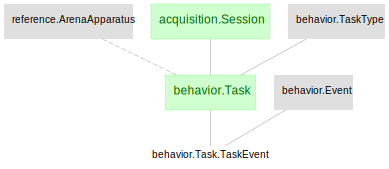

In [31]:
dj.Diagram(behavior) - 1

In [ ]:
behavior.Task.TaskEvent

In [32]:
reference.ArenaApparatus.ArenaGeometry()

arena_apparatus,arena_geometry,arena_x_dim (cm),arena_y_dim (cm),wall_height (cm)
circle_150,circle,150.0,150.0,50.0
Circle_80,circle,80.0,80.0,30.0
holding_box,rectangle,20.0,25.0,10.0
Megaspace,square,400.0,400.0,70.0
Photostim_box,rectangle,30.0,20.0,15.0
Rectangle,rectangle,150.0,100.0,50.0
square_100,square,100.0,100.0,30.0
square_150,square,150.0,150.0,50.0
square_400,square,400.0,400.0,nan
square_50,square,50.0,50.0,30.0


In [33]:
reference.ArenaObject()

arena_object,"obj_geometry e.g. cube, cylinder",obj_width (cm),obj_length (cm),obj_height (cm)


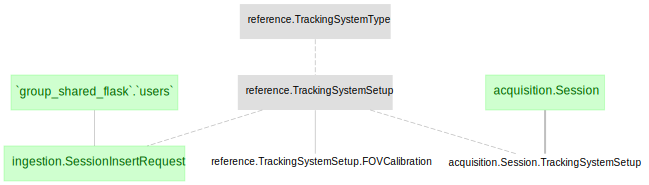

In [34]:
dj.Diagram(reference.TrackingSystemSetup) + 1 - 1

In [35]:
acquisition.Session.describe();

-> animal.Animal
session_time         : datetime                     # start time of this session
---
session_note=null    : longblob                     



In [36]:
tracking.ProcessedTracking.Position()


animal_id,datasource_id,session_time start time of this session,tracking_time start time of this tracking recording,tracking_processing_method,sync_method sync method name,position_x (cm),position_y (cm),position_z (cm),speed (cm/s)
00342c6d86e97d43,0,2019-07-04 20:35:12,2019-07-04 20:34:48,3d_optitrack,linear_interp,=BLOB=,=BLOB=,=BLOB=,=BLOB=
219de16fa9d2f8fc,0,2017-09-21 14:14:57,2017-09-21 14:14:57,2d_2led,linear_interp,=BLOB=,=BLOB=,=BLOB=,=BLOB=
219de16fa9d2f8fc,0,2017-09-21 14:14:57,2017-09-21 14:32:56,2d_2led,linear_interp,=BLOB=,=BLOB=,=BLOB=,=BLOB=
219de16fa9d2f8fc,0,2017-09-21 14:14:57,2017-09-21 14:39:35,2d_2led,linear_interp,=BLOB=,=BLOB=,=BLOB=,=BLOB=
219de16fa9d2f8fc,0,2017-09-21 14:14:57,2017-09-21 14:42:14,2d_2led,linear_interp,=BLOB=,=BLOB=,=BLOB=,=BLOB=
219de16fa9d2f8fc,0,2017-10-11 15:13:12,2017-10-11 15:13:12,2d_2led,linear_interp,=BLOB=,=BLOB=,=BLOB=,=BLOB=
219de16fa9d2f8fc,0,2017-10-11 15:13:12,2017-10-11 15:54:41,2d_2led,linear_interp,=BLOB=,=BLOB=,=BLOB=,=BLOB=
219de16fa9d2f8fc,0,2017-10-11 15:13:12,2017-10-11 15:56:30,2d_2led,linear_interp,=BLOB=,=BLOB=,=BLOB=,=BLOB=
219de16fa9d2f8fc,0,2017-10-11 15:13:12,2017-10-11 15:58:16,2d_2led,linear_interp,=BLOB=,=BLOB=,=BLOB=,=BLOB=
219de16fa9d2f8fc,0,2017-10-13 13:53:29,2017-10-13 13:53:29,2d_2led,linear_interp,=BLOB=,=BLOB=,=BLOB=,=BLOB=
